In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [69]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('HoneyData.csv')

In [3]:
df.head()

,product_id,title,categories
0,1B01I29Y344,The Subtle Art of Not Giving a F*ck: A Counter...,Books
1,1B00KDLTMQY,The Truth About Drew,Books
2,11607746239,NOPI: The Cookbook,Books
3,1B00CXAVWWA,Robinson Crusoe: The Life and Strange Surprizi...,Books
4,10020136803,Cassell's French & English Dictionary,Books


# Exploratory Data Analysis

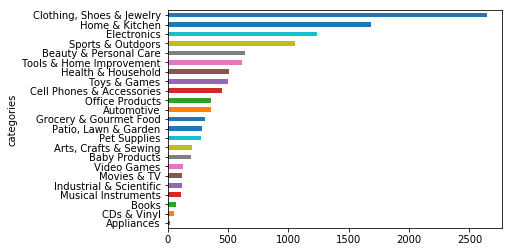

In [21]:
classdistro = df.groupby('categories').title.count()
classdistro.sort_values().plot.barh()

In [55]:
classdistro = classdistro*100.0/sum(classdistro)
print classdistro.sort_values(ascending=False)

categories
Clothing, Shoes & Jewelry    22.127303
Home & Kitchen               14.087102
Electronics                  10.351759
Sports & Outdoors             8.819095
Beauty & Personal Care        5.360134
Tools & Home Improvement      5.167504
Health & Household            4.229481
Toys & Games                  4.179229
Cell Phones & Accessories     3.802345
Office Products               3.031826
Automotive                    2.998325
Grocery & Gourmet Food        2.613065
Patio, Lawn & Garden          2.361809
Pet Supplies                  2.303183
Arts, Crafts & Sewing         1.716918
Baby Products                 1.641541
Video Games                   1.088777
Movies & TV                   0.988275
Industrial & Scientific       0.971524
Musical Instruments           0.938023
Books                         0.611390
CDs & Vinyl                   0.418760
Appliances                    0.192630
Name: title, dtype: float64


# Feature Engineering

In [165]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, max_df=0.5, max_features=5000,
                        encoding='utf-8', norm='l2', 
                        ngram_range=(1, 4), stop_words='english', lowercase=True)

In [166]:
X = tfidf.fit_transform(df.title.astype(str)).toarray()
print X.shape

(11946, 2777)


In [167]:
X_df = pd.DataFrame(X, columns= tfidf.get_feature_names())
X_df.head()

,00,000,001,01,04,05,10,10 feet,10 inch,10 pack,...,yoga mat,york,youth,zebra,zero,zinus,zip,zipper,zirconia,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
factorize_matrix = NMF(n_components=500)
X = factorize_matrix.fit_transform(X)

In [96]:
y = df.categories.astype(str)

In [92]:
classdistro = classdistro.to_dict()

In [102]:
for i in range(len(y)):
    if classdistro.get(y[i], 100) <5.0:
        y[i] = 'other'

# Model Selection

In [99]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    #LinearSVC(),
    #MultinomialNB(),
    #LogisticRegression(random_state=0),
]

In [169]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [170]:
print cv_df

               model_name  fold_idx  accuracy
0  RandomForestClassifier         0  0.440033
1  RandomForestClassifier         1  0.447324
2  RandomForestClassifier         2  0.448074
3  RandomForestClassifier         3  0.452870
4  RandomForestClassifier         4  0.445935
